# Modelo Automl classificação - Previsão de Insuficiência Cardíaca

**Objetivo criar modelo para prever a mortalidade causada por Insuficiência Cardíaca. E comparar a taxa de mortalidade com outros conjuntos de dados antigos famosos e ver a correlação. Segunda parte comparar os gêneros e idades com outros de várias cidades**

**Objetivo criar modelo para classifcação pessoa vai ter uma insuficiência cardíaca**

**Coluna target - Mortality**

**Dicionario dados**
- Idade: idade do paciente

- Faixa etária: como 21-30 e 31-40 são agrupados

- Sexo: Sexo do paciente

- Localidade: Rural ou Urbana

- Estado civil: casado ou solteiro

- Fumar: sim/não

- Depressão: sim/não

- Mortalidade: Morto = 0 e Vivo = 1

- Follow.Up: Número de visitas

- cp : Tipo de dor no peito tipo de dor no peito

- Diabetes: 0 significa sim e 1 significa não

- chol : colestoral em mg/dl obtido via sensor de IMC

- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = verdadeiro; 0 = falso)

- tretbps: pressão arterial em repouso (em mm Hg)

- rest_ecg : resultados eletrocardiográficos em repouso

- Valor 0: normal

- Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão ST > 0,05 mV)

- Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

- talach: frequência cardíaca máxima alcançada

- CONTAGEM DE PLAQUETAS

- Hemoglobina

# Importação bibliotecas

In [1]:
# Importação bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#
import warnings
warnings.filterwarnings("ignore")

# Versão da Linguagem Python
from platform import python_version
print('Versão Python - Jupyter Notebook:', python_version())

Versão Python - Jupyter Notebook: 3.8.15


# Base de dados

In [2]:
# Base de dados
dt = pd.read_csv("FIC.Full CSV.csv")
dt

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32


In [3]:
# Visualizando os 15 primeiros dados
dt.head(15)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
5,56,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.9,2,2,7,2,1,NO,0,1,32
6,57,51-60,Female,RURAL,MARRIED,YES,YES,PAID,YES,YES,...,0.2,2,0,7,1,1,NO,0,0,60
7,57,51-60,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,0.0,2,1,3,1,1,NO,0,1,3
8,58,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.0,1,2,3,3,1,NO,0,0,15
9,58,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.8,2,2,6,2,1,NO,0,0,6


In [4]:
# Visualizando os 15 últimos dados
dt.tail(15)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
353,50,41-50,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,2.8,3,0,6,2,1,COUGH.BLEEDING,1,1,32
354,50,41-50,Male,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,0.0,2,3,7,3,1,LUNGS,1,1,15
355,50,41-50,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,1.2,2,0,7,1,1,COUGH.BLEEDING,1,1,52
356,50,41-50,Male,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.6,2,0,3,1,1,NAUSEA.TEMP,1,0,49
357,52,51-60,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,0.8,1,0,7,1,1,COUGH.BLEEDING,1,1,29
358,52,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.8,2,2,7,2,1,BODY.PAIN,1,0,36
359,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.0,1,0,3,1,1,STOMACH.BLEEDING,1,0,32
360,55,51-60,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.0,2,1,3,1,1,STOMACH.BLEEDING,1,0,15
361,55,51-60,Male,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,1.0,3,0,7,1,1,SKIN.BLEEDING,1,0,4
362,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.0,1,2,7,3,1,SKIN.BLEEDING,1,0,9


In [5]:
# Visualizando linhas e colunas
dt.shape

(368, 60)

In [6]:
# Info dados
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [7]:
# Amostra dados
dt.sample(10)

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
240,61,61-70,Female,RURAL,MARRIED,YES,YES,PAID,YES,YES,...,0.0,1,0,3,1,1,NO,0,1,12
198,46,41-50,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.1,2,0,7,1,1,SKIN.BLEEDING,1,1,15
141,35,31-40,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,3.8,2,0,7,4,1,NO,0,0,9
218,51,51-60,Male,URBAN,MARRIED,NO,NO,PAID,YES,YES,...,1.6,1,0,7,1,1,STOMACH.BLEEDING,1,0,12
242,62,61-70,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,3.6,3,2,3,3,1,NO,0,0,15
359,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.0,1,0,3,1,1,STOMACH.BLEEDING,1,0,32
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34
286,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,2,1,7,4,1,SKIN.BLEEDING,1,0,15
299,63,61-70,Female,RURAL,MARRIED,YES,YES,PAID,YES,YES,...,4.0,2,3,7,4,1,NO,0,1,8
217,50,41-50,Male,URBAN,MARRIED,YES,NO,FREE,NO,NO,...,0.9,2,0,7,3,1,COUGH.BLEEDING,1,0,52


In [8]:
dt.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [9]:
dt.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                       object
Locality                                                                                     object
Marital status                                                                               object
Life.Style                                                                                   object
Sleep                                                                                        object
Category                                                                                     object
Depression                                                                                   object
Hyperlipi                                                                                    object


In [10]:
# Lista de colunas categóricas

categoric = ['Gender',
             'Gender',
             "Sleep",
             "Category",
             "Depression",
             "Hyperlipi",
             "SK.React"]


# Lista de colunas numéricas
numb = ['F.History', 
        'Diabetes', 
        'BGR', 
        'B.Urea', 
        'S.Sodium', 
       "S.Chloride",
       "CK.MB",
       "ESR",
       "WBC",
       "RBC",
       "PLATELET_COUNT",
       "cp"]

# Variavel target
target = ['Mortality']

In [11]:
dt['Mortality'].value_counts()

0    288
1     80
Name: Mortality, dtype: int64

# Explorando as Variáveis Numéricas

In [12]:
# Resumo das variáveis numéricas
dt[numb].describe()

,F.History,Diabetes,BGR,B.Urea,S.Sodium,S.Chloride,CK.MB,ESR,WBC,RBC,PLATELET_COUNT,cp
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.195652,0.461957,219.991848,51.681522,138.019022,103.817935,62.491848,26.565217,11181.277174,5.090217,248660.326087,3.671196
std,0.397242,0.499229,139.337387,62.582571,4.079879,4.799751,89.789096,32.579496,3517.876535,0.771962,76707.564945,0.772862
min,0.000000,0.000000,60.000000,2.300000,129.000000,90.000000,14.000000,5.000000,5800.000000,3.460000,20000.000000,1.000000
25%,0.000000,0.000000,117.000000,28.000000,135.000000,100.000000,21.000000,11.000000,7800.000000,4.400000,192000.000000,4.000000
50%,0.000000,0.000000,164.000000,36.000000,138.000000,104.000000,36.000000,16.000000,10650.000000,5.200000,237000.000000,4.000000
75%,0.000000,1.000000,291.000000,43.000000,141.000000,107.000000,52.000000,25.000000,13500.000000,5.650000,287000.000000,4.000000
max,1.000000,1.000000,563.000000,394.000000,146.000000,112.000000,505.000000,154.000000,19590.000000,6.980000,459000.000000,4.000000


# Explorando as Variáveis Categóricas

In [13]:
# Listando o total por categoria de cada variável categórica
for col in categoric:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(dt[col].value_counts())
    print()

Total de Registros Por Categoria da Variável Gender:
Male      285
Female     83
Name: Gender, dtype: int64

Total de Registros Por Categoria da Variável Gender:
Male      285
Female     83
Name: Gender, dtype: int64

Total de Registros Por Categoria da Variável Sleep:
NO     224
YES    144
Name: Sleep, dtype: int64

Total de Registros Por Categoria da Variável Category:
FREE    331
PAID     37
Name: Category, dtype: int64

Total de Registros Por Categoria da Variável Depression:
YES    351
NO      17
Name: Depression, dtype: int64

Total de Registros Por Categoria da Variável Hyperlipi:
YES    341
NO      27
Name: Hyperlipi, dtype: int64

Total de Registros Por Categoria da Variável SK.React:
COUGH.BLEEDING      146
NO                   93
SKIN.BLEEDING        52
BODY.PAIN            28
STOMACH.BLEEDING     25
LUNGS                16
NAUSEA.TEMP           8
Name: SK.React, dtype: int64



<AxesSubplot: xlabel='Age', ylabel='Count'>

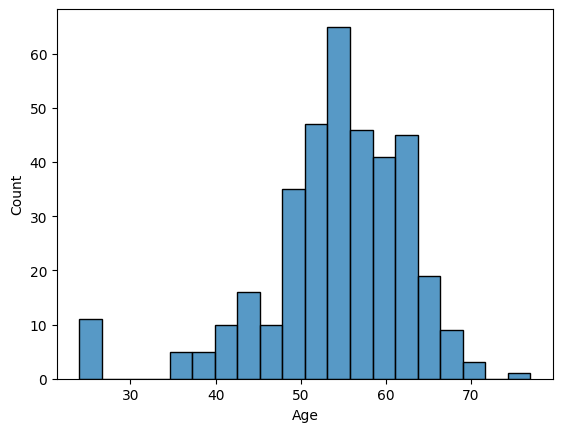

In [14]:
sns.histplot(dt["Age"])

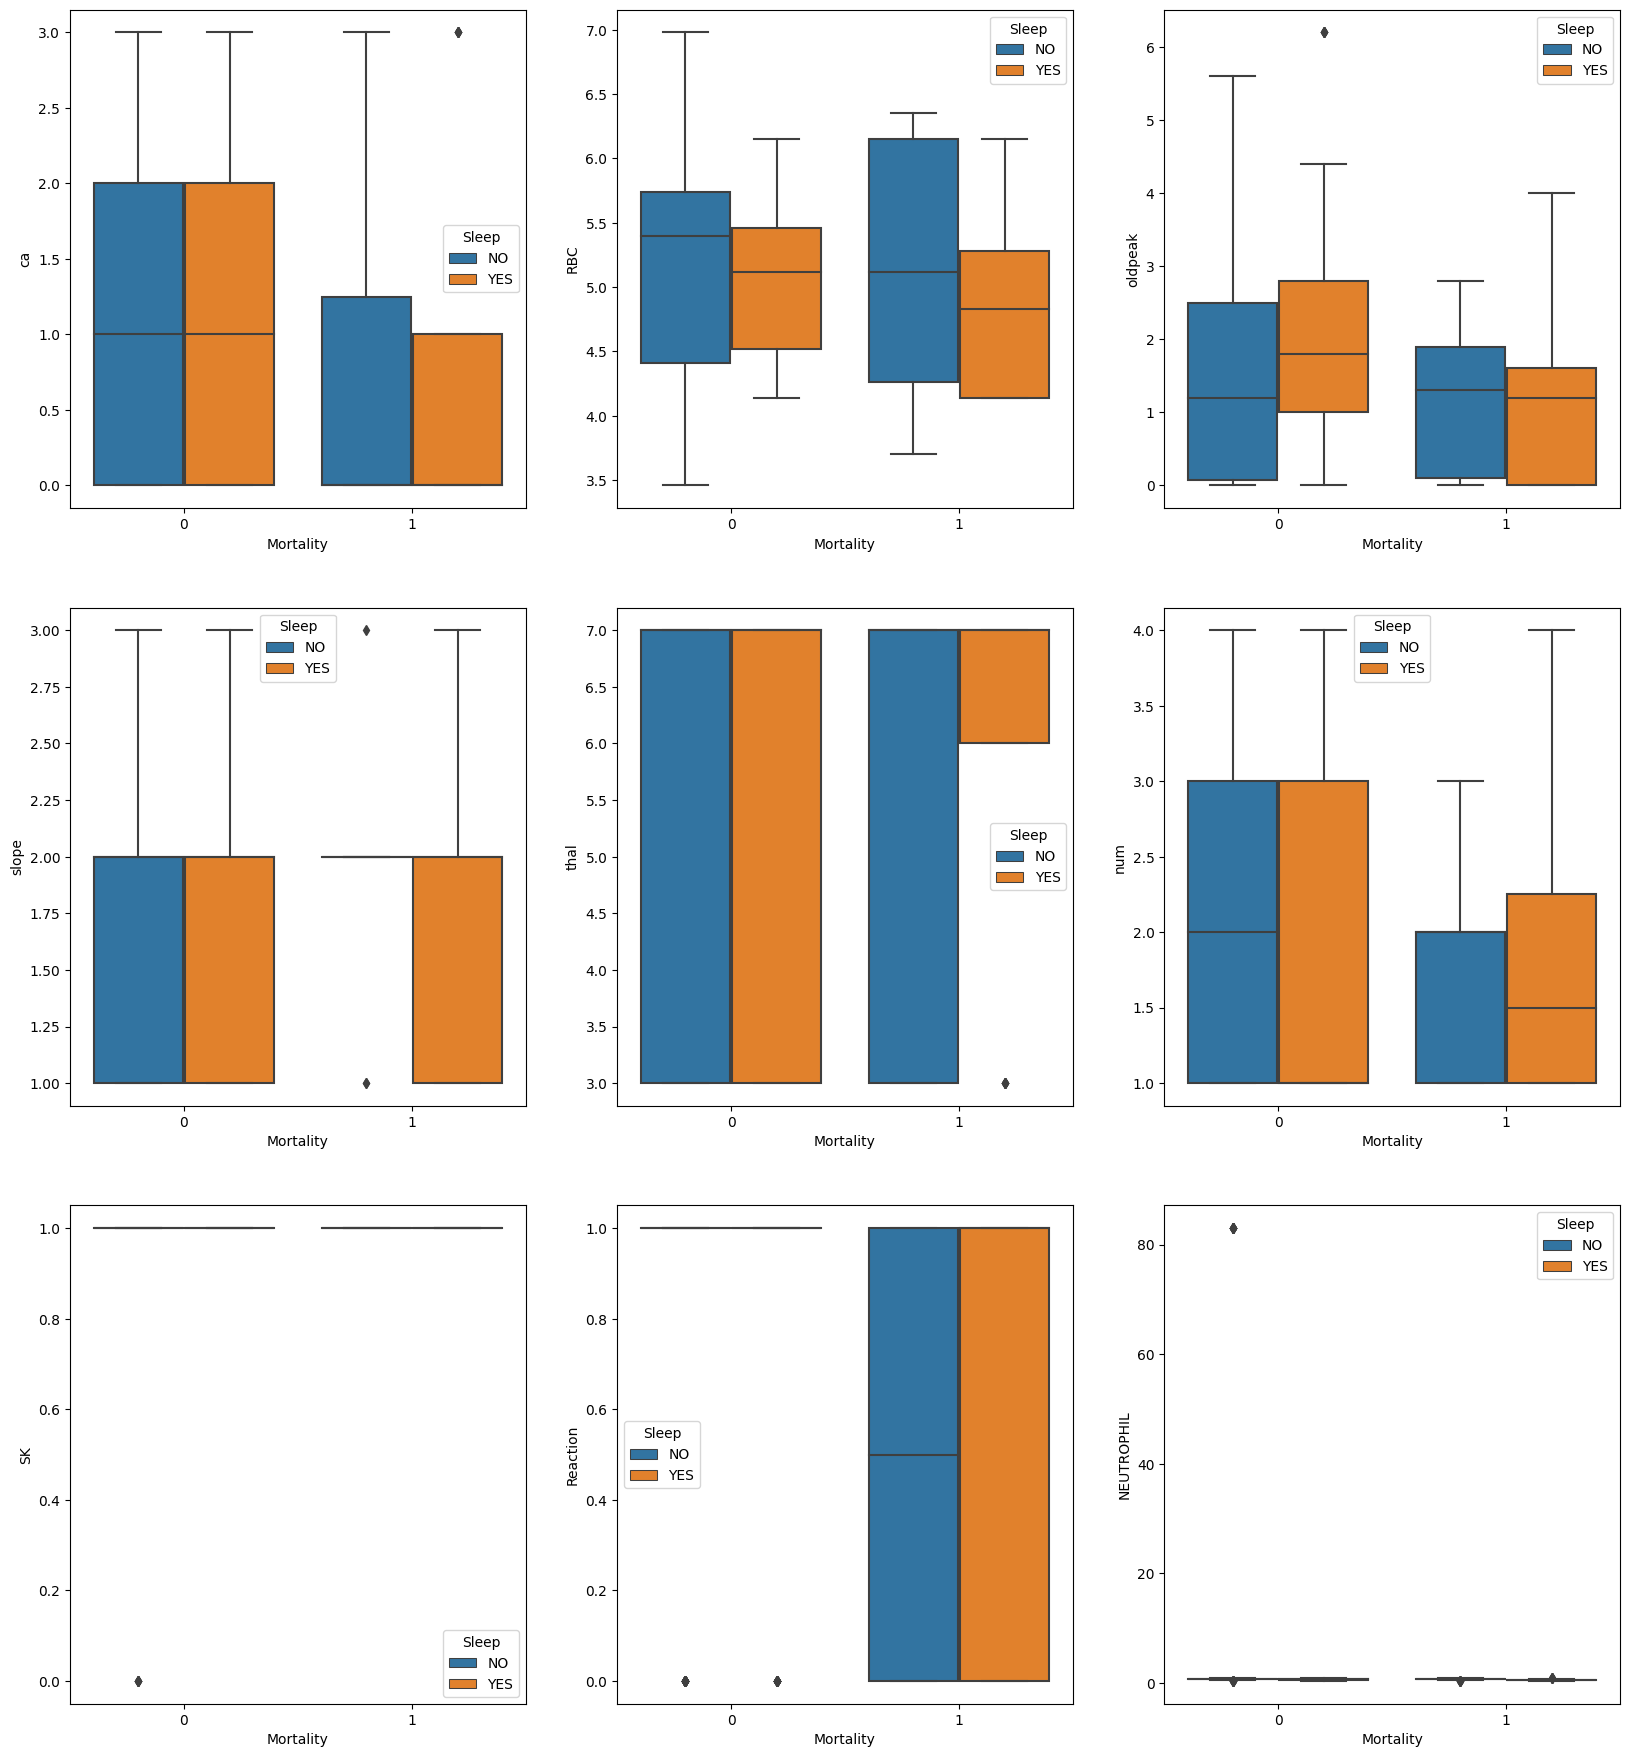

In [15]:
fig , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20, 22))

ax = sns.boxplot(data = dt, x="Mortality", y="ca", hue= "Sleep",ax=axes[0, 0])
ax = sns.boxplot(data = dt, x="Mortality", y="RBC", hue="Sleep", ax=axes[0, 1])
ax = sns.boxplot(data = dt, x="Mortality", y="oldpeak", hue="Sleep", ax=axes[0, 2])
ax = sns.boxplot(data = dt, x="Mortality", y="slope", hue="Sleep", ax=axes[1, 0])
ax = sns.boxplot(data = dt, x="Mortality", y="thal", hue="Sleep", ax=axes[1, 1])
ax = sns.boxplot(data = dt, x="Mortality", y="num", hue="Sleep", ax=axes[1, 2])
ax = sns.boxplot(data = dt, x="Mortality", y="SK", hue="Sleep", ax=axes[2, 0])
ax = sns.boxplot(data = dt, x="Mortality", y="Reaction", hue="Sleep", ax=axes[2, 1])
ax = sns.boxplot(data = dt, x="Mortality", y="NEUTROPHIL", hue="Sleep", ax=axes[2, 2])
plt.show()

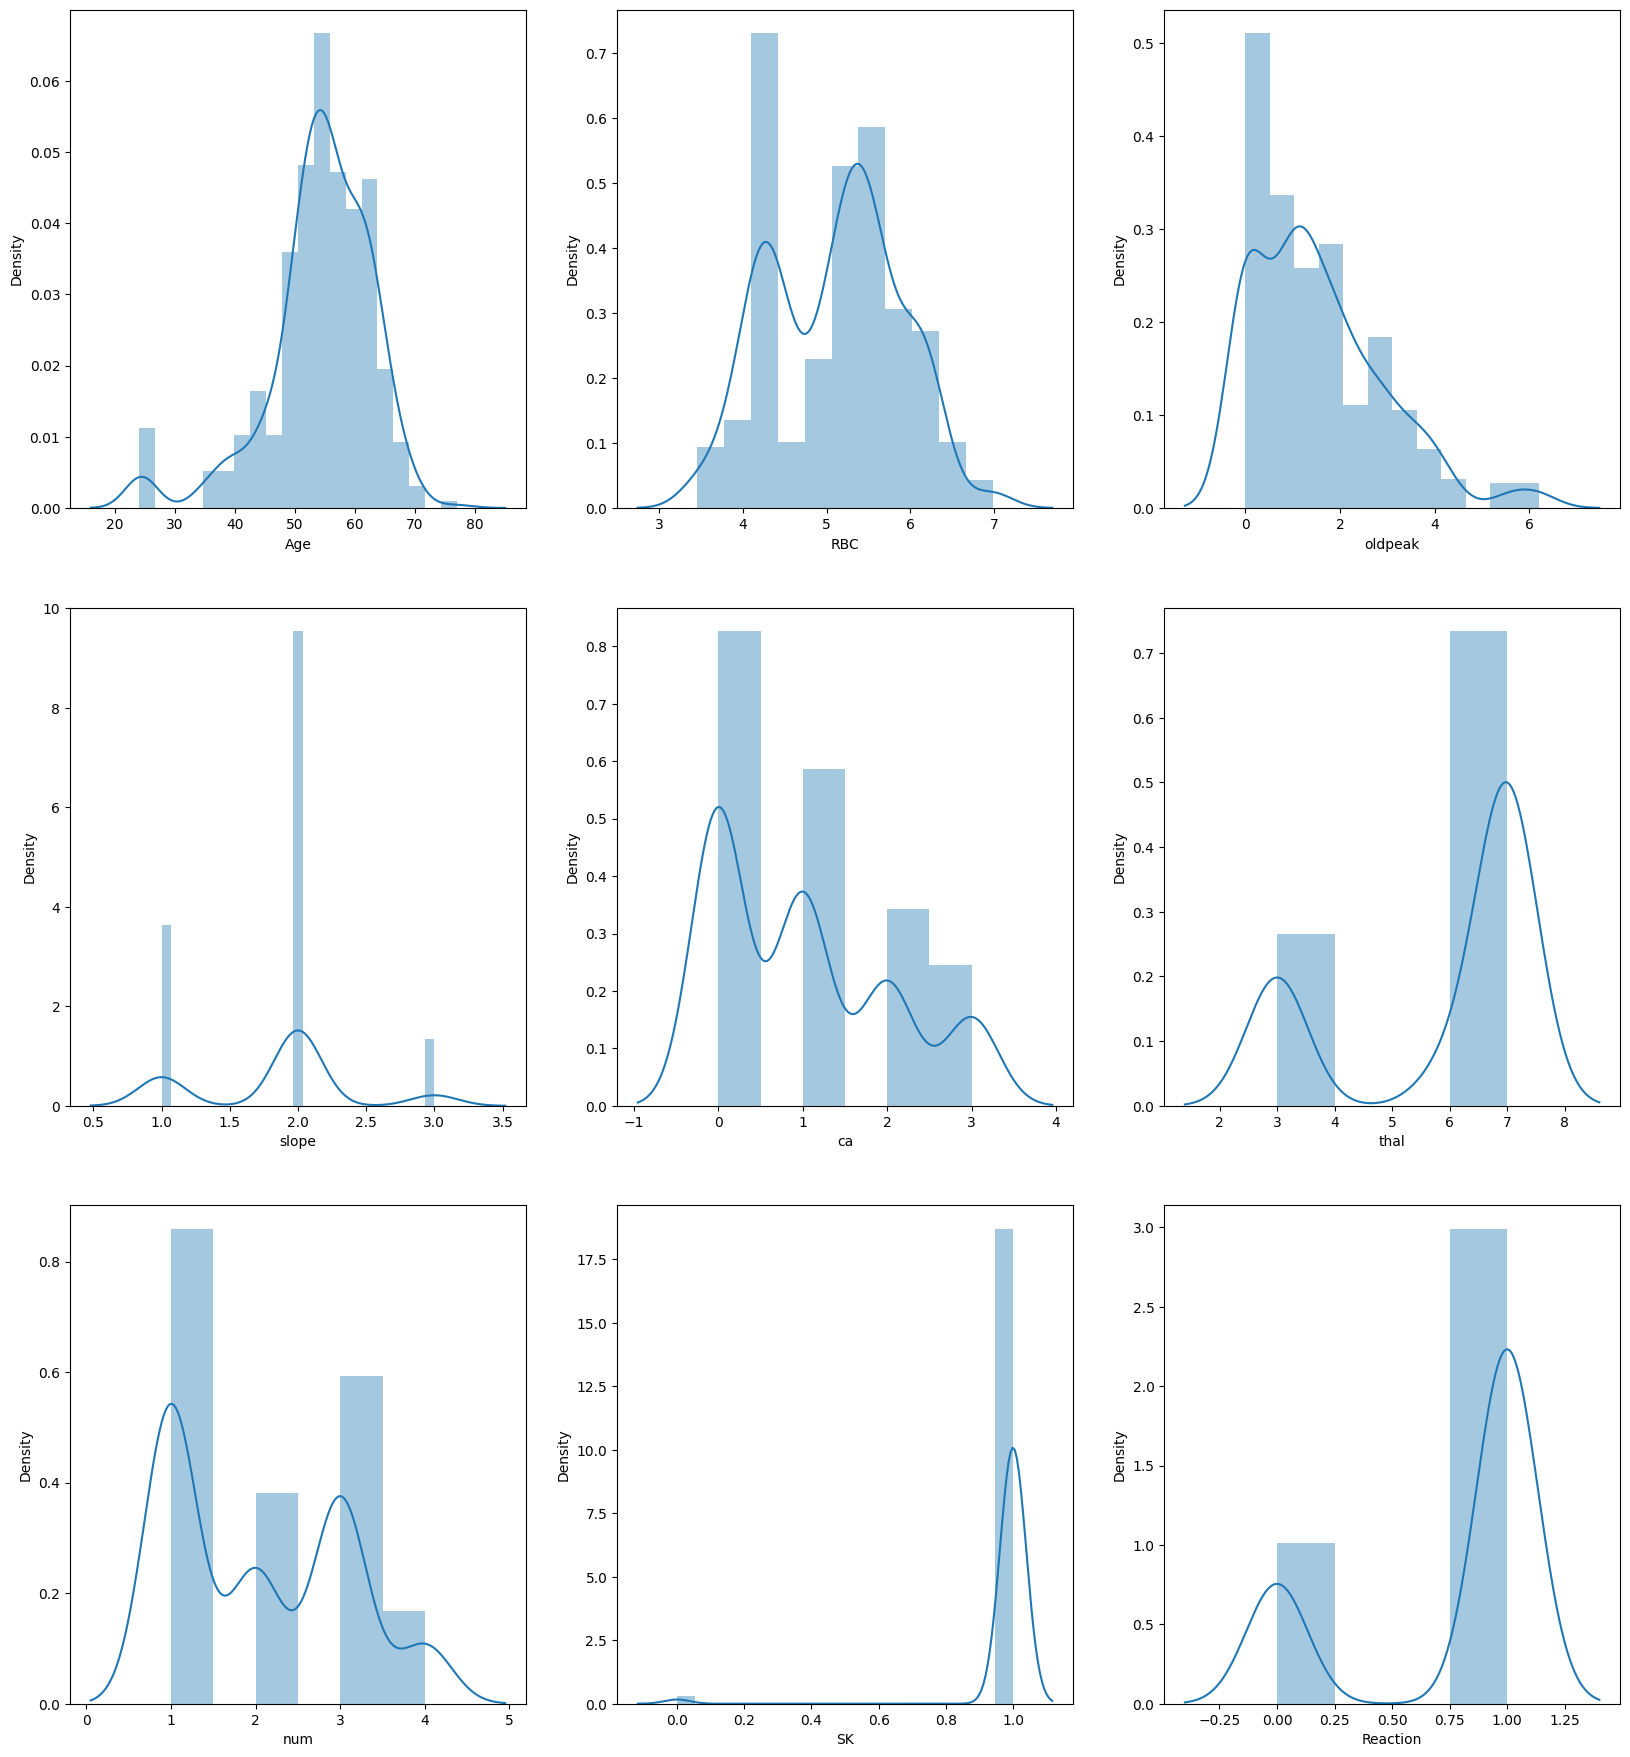

In [16]:
fig , axes = plt.subplots(nrows=3,ncols=3 , figsize = (20, 22))

ax = sns.distplot(dt["Age"] , ax=axes[0, 0])
ax = sns.distplot(dt["RBC"] ,  ax=axes[0, 1])
ax = sns.distplot(dt["oldpeak"] , ax=axes[0, 2])
ax = sns.distplot(dt["slope"], ax=axes[1, 0] )
ax = sns.distplot(dt["ca"] , ax=axes[1, 1] )
ax = sns.distplot(dt["thal"] , ax=axes[1, 2] )
ax = sns.distplot(dt["num"] , ax=axes[2, 0])
ax = sns.distplot(dt["SK"], ax=axes[2, 1])
ax = sns.distplot(dt["Reaction"], ax=axes[2, 2])


plt.show()

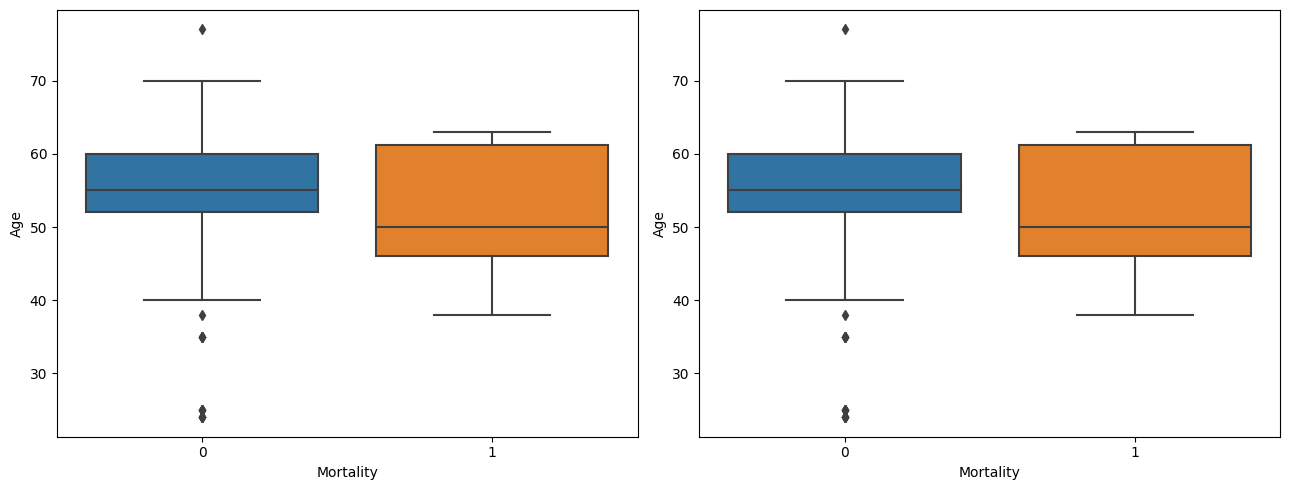

In [17]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
sns.boxplot(y=dt['Age'],x=dt['Mortality'],ax=ax[0])
sns.boxplot(y=dt['Age'],x=dt['Mortality'],ax=ax[1])
plt.tight_layout()

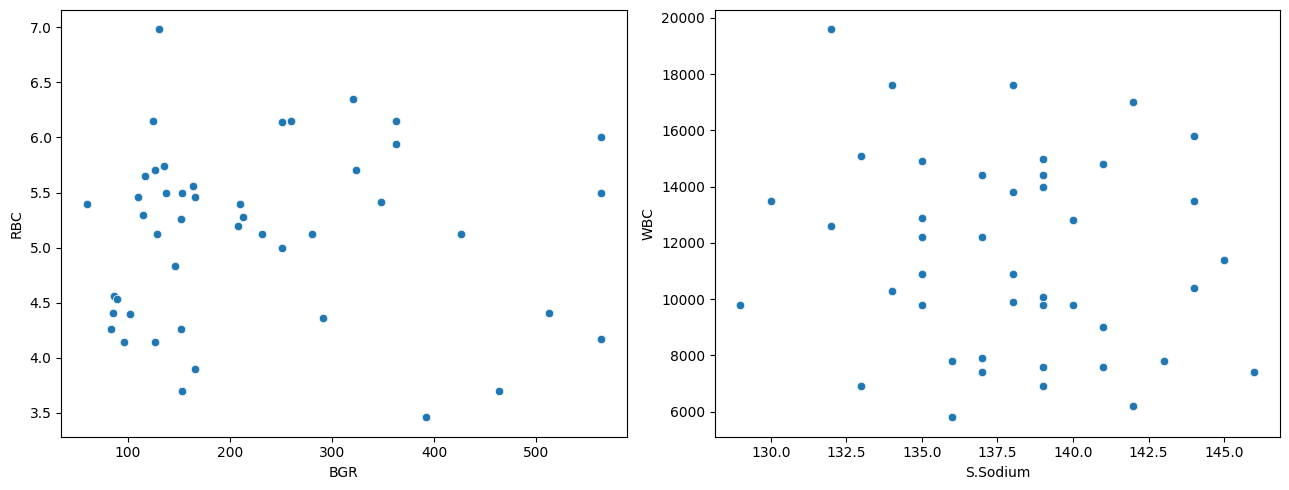

In [18]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
sns.scatterplot(y=dt['RBC'],x=dt['BGR'],ax=ax[0])
sns.scatterplot(y=dt['WBC'],x=dt['S.Sodium'],ax=ax[1])
plt.tight_layout()

<AxesSubplot: xlabel='Age', ylabel='count'>

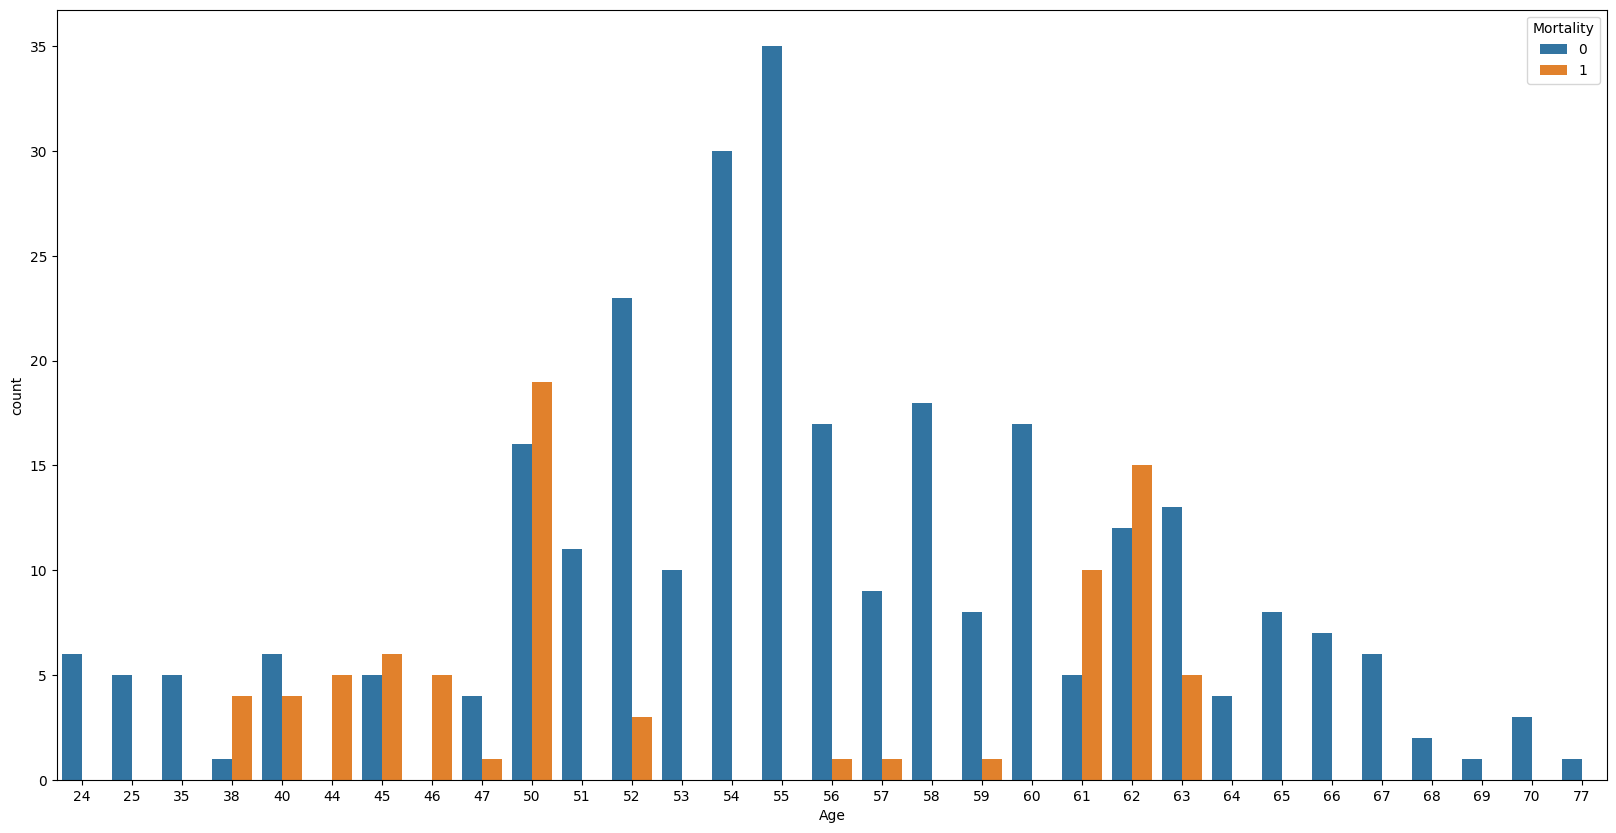

In [19]:
plt.figure(figsize=(20, 10))

sns.countplot(data = dt, x=dt["Age"], hue = "Mortality")

In [20]:
# Correlação das colunas númericas
dt[numb].corr()

,F.History,Diabetes,BGR,B.Urea,S.Sodium,S.Chloride,CK.MB,ESR,WBC,RBC,PLATELET_COUNT,cp
F.History,1.000000,-0.058543,0.043054,-0.169806,-0.099815,0.084472,-0.177722,-0.158894,-0.003611,0.188856,0.168242,-0.118271
Diabetes,-0.058543,1.000000,-0.239477,0.220138,0.029119,0.089779,-0.147871,0.151599,-0.219596,-0.362756,0.199709,0.055767
BGR,0.043054,-0.239477,1.000000,-0.182553,0.104572,-0.106674,0.030095,-0.086750,0.043823,0.098862,-0.120391,-0.116670
B.Urea,-0.169806,0.220138,-0.182553,1.000000,-0.189550,0.243662,0.068208,0.180587,0.307613,-0.147607,0.009810,0.079521
S.Sodium,-0.099815,0.029119,0.104572,-0.189550,1.000000,0.059592,0.001008,-0.181686,-0.205675,-0.284549,0.197956,0.059886
S.Chloride,0.084472,0.089779,-0.106674,0.243662,0.059592,1.000000,0.108185,-0.193384,0.066140,-0.014182,-0.103335,0.043316
CK.MB,-0.177722,-0.147871,0.030095,0.068208,0.001008,0.108185,1.000000,-0.040551,0.178585,0.202906,0.108857,-0.178990
ESR,-0.158894,0.151599,-0.086750,0.180587,-0.181686,-0.193384,-0.040551,1.000000,0.103131,-0.495108,0.196862,0.060859
WBC,-0.003611,-0.219596,0.043823,0.307613,-0.205675,0.066140,0.178585,0.103131,1.000000,0.185574,0.110398,-0.018827
RBC,0.188856,-0.362756,0.098862,-0.147607,-0.284549,-0.014182,0.202906,-0.495108,0.185574,1.000000,-0.216257,-0.095468


In [21]:
# Correlação
data_corr = dt[numb].corr()
data_corr

,F.History,Diabetes,BGR,B.Urea,S.Sodium,S.Chloride,CK.MB,ESR,WBC,RBC,PLATELET_COUNT,cp
F.History,1.000000,-0.058543,0.043054,-0.169806,-0.099815,0.084472,-0.177722,-0.158894,-0.003611,0.188856,0.168242,-0.118271
Diabetes,-0.058543,1.000000,-0.239477,0.220138,0.029119,0.089779,-0.147871,0.151599,-0.219596,-0.362756,0.199709,0.055767
BGR,0.043054,-0.239477,1.000000,-0.182553,0.104572,-0.106674,0.030095,-0.086750,0.043823,0.098862,-0.120391,-0.116670
B.Urea,-0.169806,0.220138,-0.182553,1.000000,-0.189550,0.243662,0.068208,0.180587,0.307613,-0.147607,0.009810,0.079521
S.Sodium,-0.099815,0.029119,0.104572,-0.189550,1.000000,0.059592,0.001008,-0.181686,-0.205675,-0.284549,0.197956,0.059886
S.Chloride,0.084472,0.089779,-0.106674,0.243662,0.059592,1.000000,0.108185,-0.193384,0.066140,-0.014182,-0.103335,0.043316
CK.MB,-0.177722,-0.147871,0.030095,0.068208,0.001008,0.108185,1.000000,-0.040551,0.178585,0.202906,0.108857,-0.178990
ESR,-0.158894,0.151599,-0.086750,0.180587,-0.181686,-0.193384,-0.040551,1.000000,0.103131,-0.495108,0.196862,0.060859
WBC,-0.003611,-0.219596,0.043823,0.307613,-0.205675,0.066140,0.178585,0.103131,1.000000,0.185574,0.110398,-0.018827
RBC,0.188856,-0.362756,0.098862,-0.147607,-0.284549,-0.014182,0.202906,-0.495108,0.185574,1.000000,-0.216257,-0.095468


<AxesSubplot: >

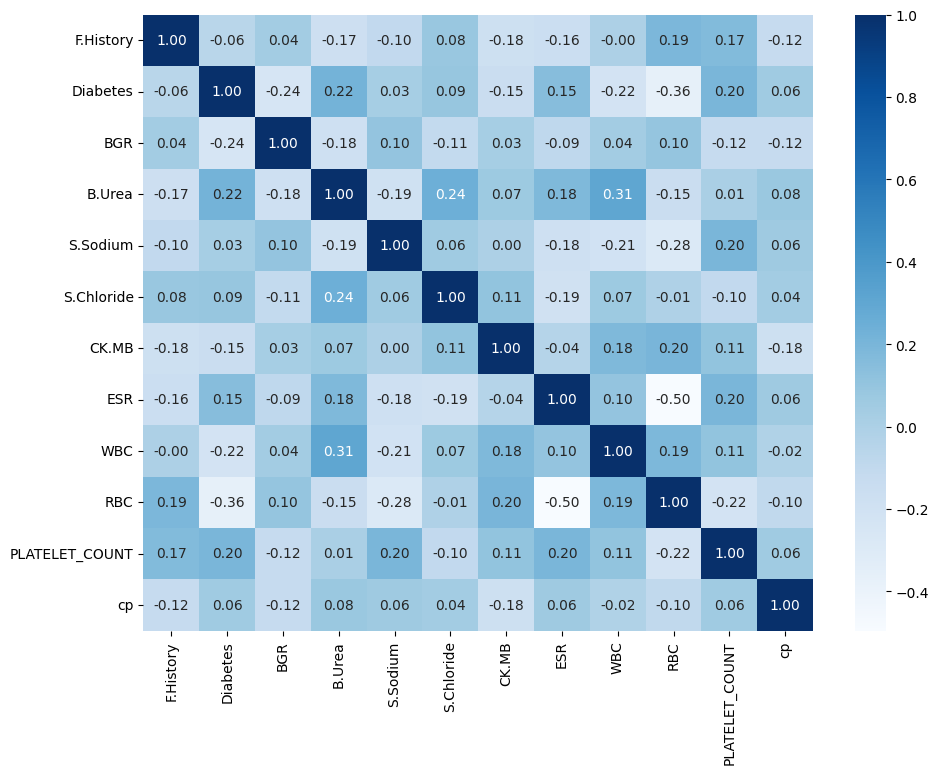

In [22]:
# Gráfico
plt.figure(figsize = (10.8, 8))
sns.heatmap(data_corr, cmap = 'Blues', annot = True, fmt = '.2f')

<Figure size 1500x1500 with 0 Axes>

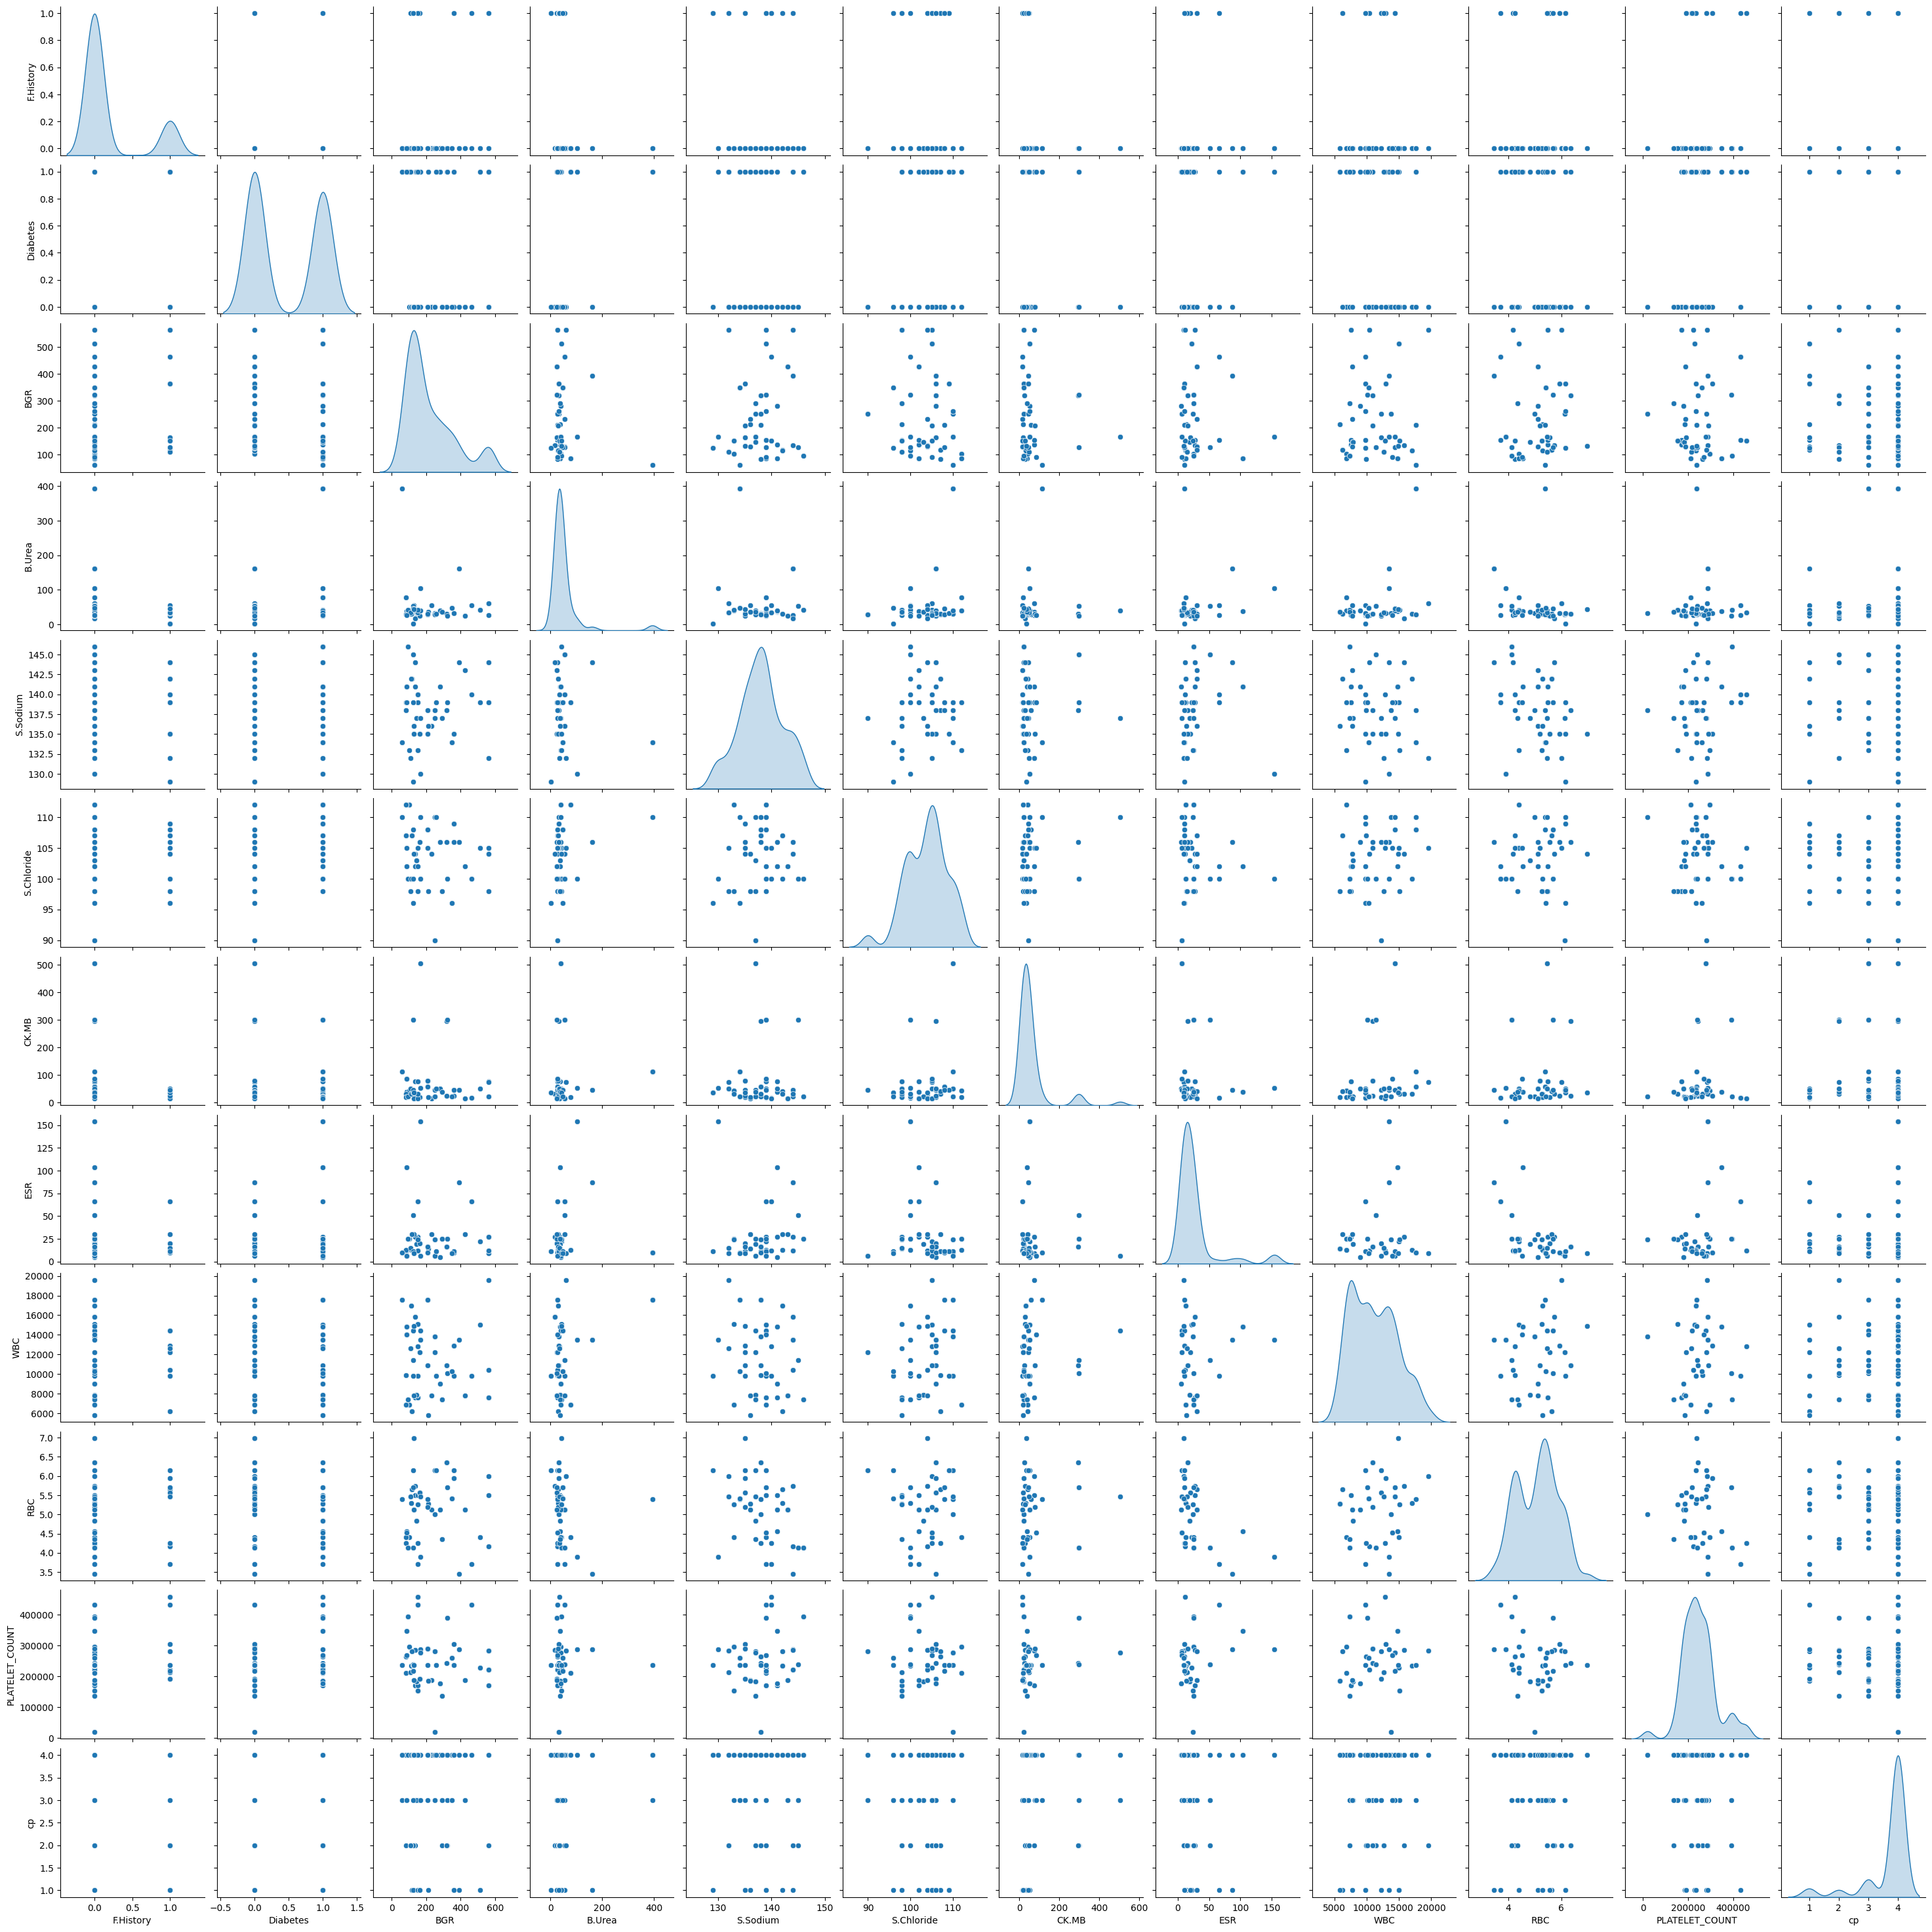

In [23]:
plt.figure(figsize = (15, 15))
sns.pairplot(dt[numb], diag_kind = 'kde')

# Modelo Automl

In [24]:
from pycaret.classification import *

model = setup(dt, 
             target = "Mortality",
             session_id = 123, 
             log_experiment = True, 
             numeric_imputation = 'mean',
             silent = True)

,Description,Value
0,session_id,123
1,Target,Mortality
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(368, 60)"
5,Missing Values,False
6,Numeric Features,25
7,Categorical Features,34
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
# Modelos melhores
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9766,0.9710,0.9300,0.9690,0.9430,0.9286,0.9334,0.0210
gbc,Gradient Boosting Classifier,0.9728,0.9773,0.9333,0.9524,0.9359,0.9190,0.9242,0.0670
et,Extra Trees Classifier,0.9728,0.9976,0.9300,0.9514,0.9355,0.9185,0.9224,0.0960
rf,Random Forest Classifier,0.9689,0.9965,0.9133,0.9514,0.9264,0.9070,0.9115,0.1480
ada,Ada Boost Classifier,0.9689,0.9585,0.9500,0.9274,0.9307,0.9111,0.9173,0.0470
dt,Decision Tree Classifier,0.9609,0.9500,0.9300,0.9038,0.9132,0.8882,0.8912,0.0060
ridge,Ridge Classifier,0.9180,0.0000,0.8000,0.8319,0.8054,0.7540,0.7616,0.0060
lda,Linear Discriminant Analysis,0.9098,0.9256,0.8367,0.7905,0.8032,0.7457,0.7536,0.0090
qda,Quadratic Discriminant Analysis,0.8326,0.6133,0.2267,0.7000,0.3195,0.2849,0.3536,0.0100
knn,K Neighbors Classifier,0.8091,0.8390,0.5033,0.5980,0.5241,0.4089,0.4257,0.0190


In [30]:
# Modelo 1º
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,1.0000,1.0000,0.8571,0.9231,0.8976,0.9024
1,0.9231,0.8167,0.6667,1.0000,0.8000,0.7547,0.7785
2,0.9615,0.9333,0.8333,1.0000,0.9091,0.8850,0.8909
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9600,0.9600,1.0000,0.8333,0.9091,0.8837,0.8898
8,0.9600,1.0000,0.8000,1.0000,0.8889,0.8649,0.8729


In [32]:
# Modelo 2º
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.9500,1.0000,0.8571,0.9231,0.8976,0.9024
1,0.9231,0.8417,0.6667,1.0000,0.8000,0.7547,0.7785
2,0.9615,0.9917,0.8333,1.0000,0.9091,0.8850,0.8909
3,0.9615,1.0000,0.8333,1.0000,0.9091,0.8850,0.8909
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9600,0.9900,1.0000,0.8333,0.9091,0.8837,0.8898
8,0.9600,1.0000,1.0000,0.8333,0.9091,0.8837,0.8898


In [28]:
# Model 3º random forest classifier

rf = create_model('rf', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,1.0000,1.0000,0.8571,0.9231,0.8976,0.9024
1,0.9231,0.9833,0.6667,1.0000,0.8000,0.7547,0.7785
2,0.9615,0.9917,0.8333,1.0000,0.9091,0.8850,0.8909
3,0.9615,1.0000,0.8333,1.0000,0.9091,0.8850,0.8909
4,0.9615,1.0000,1.0000,0.8571,0.9231,0.8976,0.9024
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9200,0.9900,0.8000,0.8000,0.8000,0.7500,0.7500
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [33]:
# Tuned dos modelos

model_tuned_lr = tune_model(lightgbm)
model_tuned_rf = tune_model(gbc)
model_bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,0.9500,1.0000,0.8571,0.9231,0.8976,0.9024
1,0.9231,0.9667,0.6667,1.0000,0.8000,0.7547,0.7785
2,0.9615,0.9667,0.8333,1.0000,0.9091,0.8850,0.8909
3,0.9615,1.0000,0.8333,1.0000,0.9091,0.8850,0.8909
4,0.9615,1.0000,0.8333,1.0000,0.9091,0.8850,0.8909
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9600,0.9700,1.0000,0.8333,0.9091,0.8837,0.8898
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
# Previsão do modelo de regressão logistica

model_pred_lr = predict_model(lr)
model_pred_lr.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9730,0.9947,0.8750,1.0000,0.9333,0.9165,0.9197


,Age,BP,BGR,B.Urea,S.Cr,S.Potassium,C.P.K,CK.MB,ESR,WBC,...,num_4,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING,Mortality,Label,Score
0,53.0,100.699997,563.0,27.0,0.9,4.0,174.0,21.0,12.0,10400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9999
1,62.0,90.599998,85.0,78.0,1.2,4.5,75.0,18.0,13.0,6900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9965
2,58.0,100.699997,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9989
3,63.0,160.100006,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9950
4,60.0,140.699997,166.0,104.0,4.0,5.3,322.0,52.0,154.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9933


In [35]:
# Previsão do modelo decision tree
model_pred_dt = predict_model(dt)
model_pred_dt.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9640,0.9938,0.8750,0.9545,0.9130,0.8904,0.8917


,Age,BP,BGR,B.Urea,S.Cr,S.Potassium,C.P.K,CK.MB,ESR,WBC,...,num_4,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING,Mortality,Label,Score
0,53.0,100.699997,563.0,27.0,0.9,4.0,174.0,21.0,12.0,10400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9991
1,62.0,90.599998,85.0,78.0,1.2,4.5,75.0,18.0,13.0,6900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9777
2,58.0,100.699997,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9990
3,63.0,160.100006,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9771
4,60.0,140.699997,166.0,104.0,4.0,5.3,322.0,52.0,154.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9813


In [36]:
# Previsão do modelo random forest 
model_pred_rt = predict_model(rf)
model_pred_rt.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9550,0.9957,0.7917,1.0000,0.8837,0.8563,0.8652


,Age,BP,BGR,B.Urea,S.Cr,S.Potassium,C.P.K,CK.MB,ESR,WBC,...,num_4,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING,Mortality,Label,Score
0,53.0,100.699997,563.0,27.0,0.9,4.0,174.0,21.0,12.0,10400.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1.00
1,62.0,90.599998,85.0,78.0,1.2,4.5,75.0,18.0,13.0,6900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.99
2,58.0,100.699997,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.85
3,63.0,160.100006,146.0,37.0,1.0,4.2,149.0,22.0,19.0,7900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.94
4,60.0,140.699997,166.0,104.0,4.0,5.3,322.0,52.0,154.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.92


# Métricas do modelo

In [37]:
# Evaluate modelo random forest 
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
# Evaluate modelo regressão logistica
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
# Evaluate modelo decision tree
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Curva ROC modelos

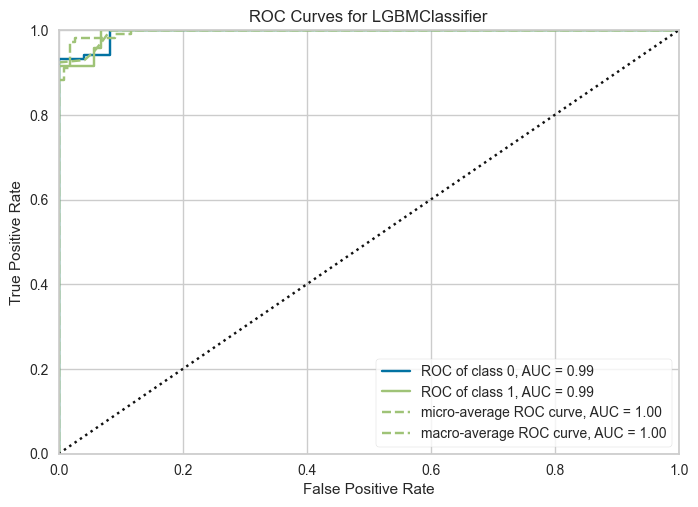

In [42]:
# Curva roc do modelo random forest 
plot_model(lightgbm)

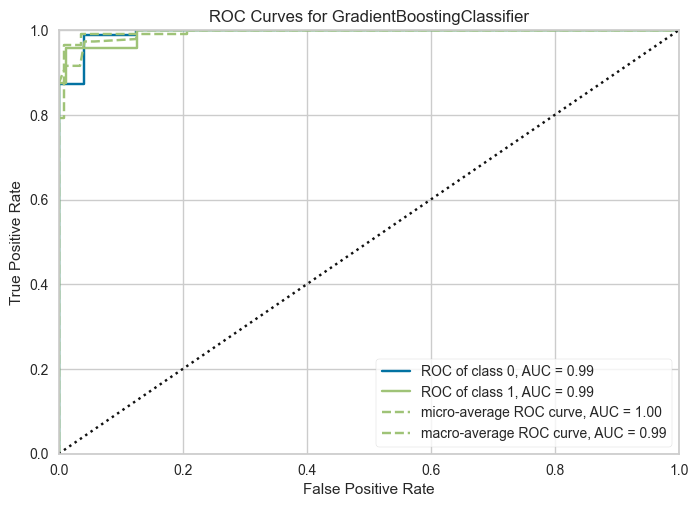

In [43]:
# Curva roc do modelo regressão logistica 
plot_model(gbc)

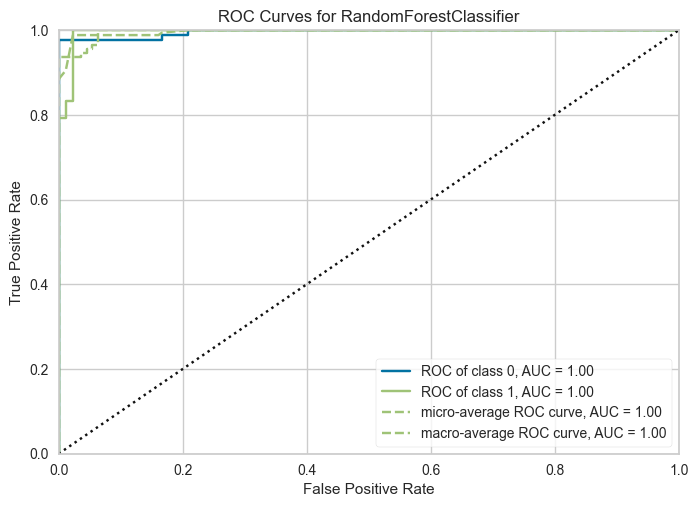

In [45]:
# Curva roc do modelo decision tree 
plot_model(rf)

# Confusion matrix

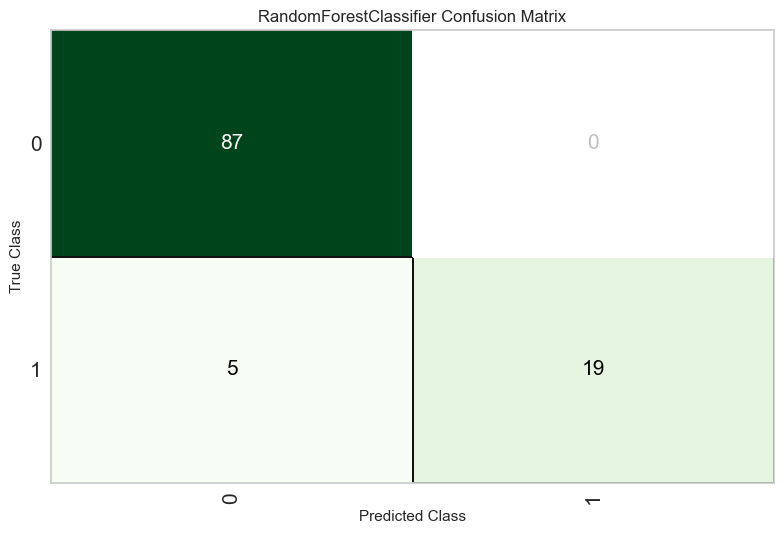

In [46]:
plot_model(rf, plot = 'confusion_matrix')

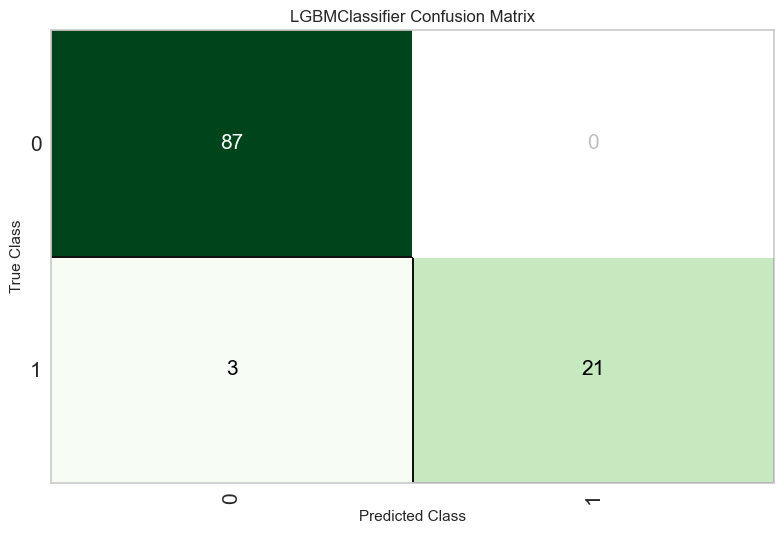

In [47]:
plot_model(lr, plot = 'confusion_matrix')

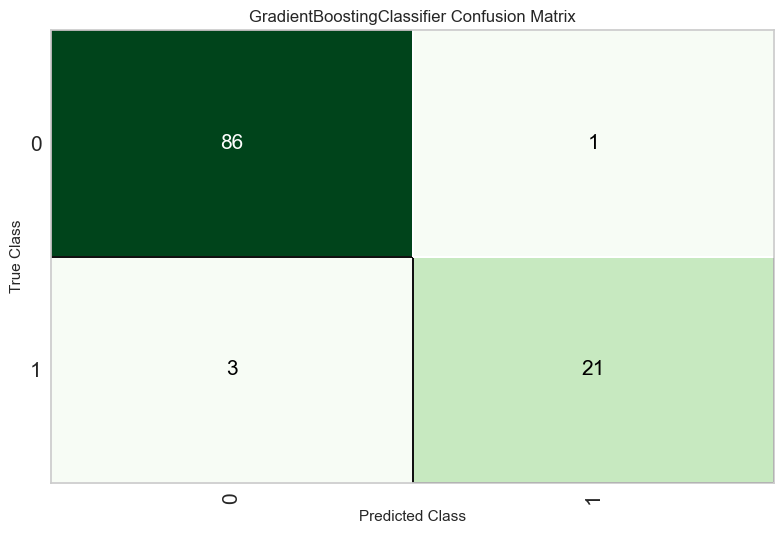

In [48]:
plot_model(dt, plot = 'confusion_matrix')

# Class report dos modelos

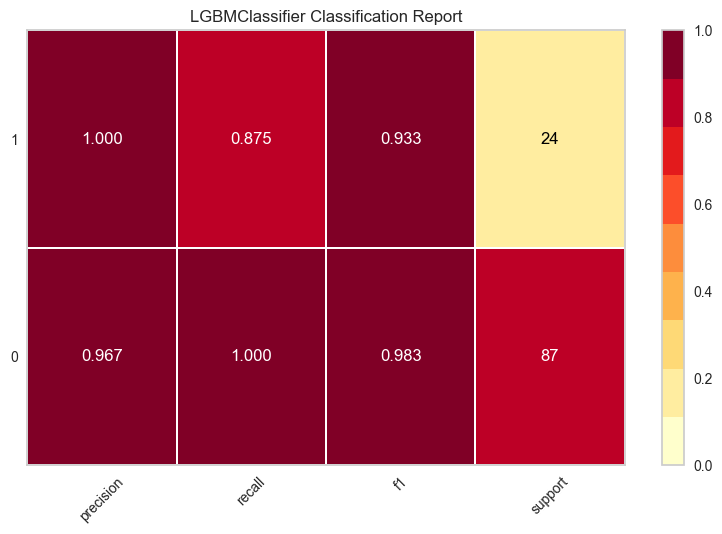

In [49]:
plot_model(lr, plot = 'class_report')

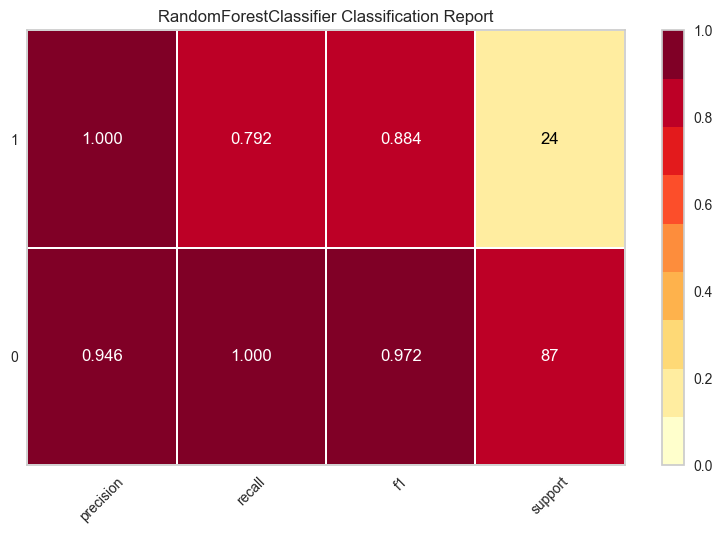

In [50]:
plot_model(rf, plot = 'class_report')

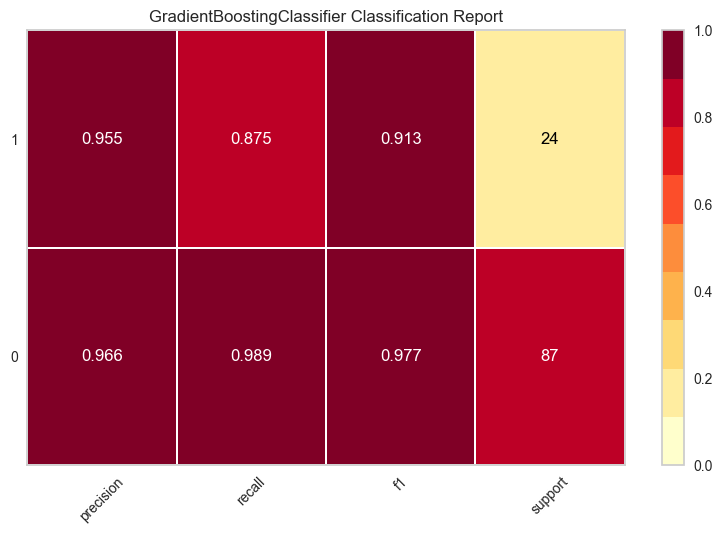

In [51]:
plot_model(dt, plot = 'class_report')

# Salvando modelo

In [52]:
save_model(lr, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Mortality',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20,

# Conclusão

Nesse modelo de classificação utlizei 3 modelos machine learning são eles regressão logística, random forest, decision tree o melhores modelos foi o regressão logística, random forest, extra trees, K-NN, ridge classifier esse objetivo do modelo e classificar tumores de câncer de mama são classificado por benignos, malignos. O resultado da matriz de confusão do primeiro modelo de regressão logística teve 132 para maligno e 73 para benigno. O modelo teve resultado ótimos no recal acima de 95,9% teve acerto total ou seja o modelo aprendeu muito.

# Referência

https://pycaret.org/

https://github.com/pycaret/pycaret

https://pycaret.readthedocs.io/en/latest/

https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763